In [1]:
from scLENS import scLENS
import pandas as pd
import torch
#import umap
#import umap.plot

Load the data to be used

In [4]:
df = pd.read_csv('./Z8eq.csv')
df

cell  ENSG00000237683  Unknown  LINC01409  LINC00115  NOC2L  KLHL17  \
0     b.cells              0.0      1.0        0.0        0.0    0.0     0.0   
1     b.cells              0.0      0.0        0.0        0.0    0.0     0.0   
2     b.cells              0.0      0.0        0.0        0.0    0.0     0.0   
3     b.cells              0.0      0.0        0.0        0.0    0.0     0.0   
4     b.cells              0.0      0.0        0.0        0.0    0.0     0.0   
...       ...              ...      ...        ...        ...    ...     ...   
3989  naive.t              0.0      0.0        0.0        0.0    0.0     0.0   
3990  naive.t              0.0      0.0        0.0        0.0    0.0     0.0   
3991  naive.t              0.0      0.0        0.0        0.0    0.0     0.0   
3992  naive.t              0.0      0.0        0.0        0.0    0.0     0.0   
3993  naive.t              0.0      0.0        0.0        0.0    0.0     0.0   

      PLEKHN1  HES4  ISG15  ...  MT-ND6  MT-CYB  ENSG00000215750  \
0         0.0   0.0    0.0  ...     0.0     2.0              0.0   
1         0.0   0.0    0.0  ...     0.0     1.0              0.0   
2         0.0   0.0    0.0  ...     0.0     3.0              0.0   
3         0.0   0.0    0.0  ...     0.0     9.0              0.0   
4         0.0   0.0    0.0  ...     0.0     3.0              0.0   
...       ...   ...    ...  ...     ...     ...              ...   
3989      0.0   0.0    0.0  ...     0.0     2.0              0.0   
3990      0.0   0.0    0.0  ...     0.0     3.0              0.0   
3991      0.0   0.0    0.0  ...     0.0     2.0              0.0   
3992      0.0   0.0    1.0  ...     0.0     2.0              0.0   
3993      0.0   0.0    0.0  ...     0.0     2.0              0.0   

      ENSG00000215781  ENSG00000220023  ENSG00000212884  ENSG00000215615  \
0                 0.0              0.0              0.0              0.0   
1                 0.0              0.0              0.0              0.0   
2                 0.0              0.0              0.0              0.0   
3                 0.0              0.0              0.0              0.0   
4                 0.0              0.0              0.0              0.0   
...               ...              ...              ...              ...   
3989              0.0              0.0              0.0              0.0   
3990              0.0              0.0              0.0              0.0   
3991              0.0              0.0              0.0              0.0   
3992              0.0              0.0              0.0              0.0   
3993              0.0              0.0              0.0              0.0   

      ENSG00000215764  ENSG00000215700  ENSG00000215699  
0                 0.0              0.0              0.0  
1                 0.0              0.0              0.0  
2                 0.0              0.0              0.0  
3                 0.0              0.0              0.0  
4                 0.0              0.0              0.0  
...               ...              ...              ...  
3989              0.0              0.0              0.0  
3990              0.0              0.0              0.0  
3991              0.0              0.0              0.0  
3992              0.0              0.0              0.0  
3993              0.0              1.0              0.0  

[3994 rows x 15717 columns]

In [5]:
y_true = df['cell']
df = df.drop('cell', axis=1)

scLENS enables GPU computation, implemented through pyTorch. Device can be specified in initiation

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
sclens = scLENS(device=device)

Data can be fed into the scLENS object in two ways: either through the preprocess() function, which preprocesses the data and saves the clean data; or feed it into the fit() or fit_transform() function, in which case the data will not be preprocessed

The preprocess() function does the following in order:
1) Remove cells expressing less than *min_genes_per_cell* genes, and genes expressed in less than *min_cells_per_gene* cells
2) L1 normalize along each cell
3) Log scale the data
4) Z-score normalization along each gene
5) L2 normalize along each cell

In [7]:
%%time
sclens.preprocess(df, min_genes_per_cell=200, min_cells_per_gene=15)

Removed 0 cells and 6065 genes in QC
CPU times: user 4.5 s, sys: 753 ms, total: 5.25 s
Wall time: 1.09 s


0         1         2         3         4         5         6     \
0    -0.044928 -0.062191 -0.209766 -0.043846 -0.368493 -0.069984 -0.168045   
1    -0.042233 -0.059156 -0.199846 -0.041278 -0.351355 -0.066724 -0.160508   
2    -0.052129 -0.070299 -0.236270 -0.050707 -0.414282 -0.078695 -0.188182   
3    -0.023984 -0.038608 -0.132684 -0.023890 -0.235321 -0.044651 -0.109478   
4    -0.040223 -0.056893 -0.192450 -0.039363 -0.338576 -0.064293 -0.154888   
...        ...       ...       ...       ...       ...       ...       ...   
3989 -0.044523 -0.061734 -0.208274 -0.043460 -0.365915 -0.069494 -0.166911   
3990 -0.051087 -0.069126 -0.232435 -0.049715 -0.407657 -0.077434 -0.185269   
3991 -0.040212 -0.056881 -0.192411 -0.039353 -0.338509 -0.064280 -0.154858   
3992 -0.036989 -0.053252 -0.180548 -0.036282  2.054510 -0.060381 -0.145845   
3993 -0.051253 -0.069313 -0.233045 -0.049872 -0.408711 -0.077635 -0.185732   

          7         8         9     ...      9641      9642      9643  \
0    -0.220833 -0.292036 -0.102165  ...  0.231486 -0.418580 -0.190407   
1    -0.211567 -0.278382 -0.097390  ... -0.286078 -0.398603 -0.181447   
2    -0.245590 -0.328516 -0.114924  ...  0.029881  0.980849 -0.214347   
3    -0.148830 -0.185939 -0.065058  ...  1.984481  3.336234 -0.120781   
4    -0.204658 -0.268202 -0.093829  ...  0.637627  1.444046 -0.174766   
...        ...       ...       ...  ...       ...       ...       ...   
3989 -0.219440 -0.289982 -0.101447  ... -0.279413  2.816676 -0.189059   
3990 -0.242008 -0.323238 -0.113078  ...  0.384818 -0.464231 -0.210883   
3991 -0.204622 -0.268148 -0.093810  ...  0.567658 -0.383630 -0.174731   
3992 -0.193541 -0.251820 -0.088100  ... -1.062554 -0.359740 -0.164015   
3993 -0.242578 -0.324077 -0.113371  ... -0.280701 -0.465459 -0.211434   

          9644      9645      9646      9647      9648      9649      9650  
0    -1.186087  0.670569 -0.124921 -0.048110 -0.088415 -0.159856 -0.157691  
1     2.157237 -0.620928 -0.119314 -0.402117 -0.084429 -0.152880 -0.150647  
2    -0.490278  1.306966 -0.139902 -0.016493 -0.099063 -0.178497 -0.176512  
3     1.303436  0.841831 -0.081351  3.675913 -0.057446 -0.105643 -0.102954  
4     0.488067 -0.598891 -0.115133  0.499741 -0.081458 -0.147677 -0.145395  
...        ...       ...       ...       ...       ...       ...       ...  
3989  0.686220  0.487445 -0.124078 -0.185931 -0.087815 -0.158807 -0.156632  
3990 -0.789063 -0.718024 -0.137734  0.282552 -0.097523 -0.175800 -0.173789  
3991 -0.248801  1.451271 -0.115111 -0.192847 -0.081442 -0.147650 -0.145367  
3992 -1.028957 -0.563431 -0.108406  0.270132 -0.076676 -0.139307 -0.136943  
3993  1.893149  0.580126 -0.138079 -0.176879 -0.097768  8.026899 -0.174222  

[3994 rows x 9651 columns]

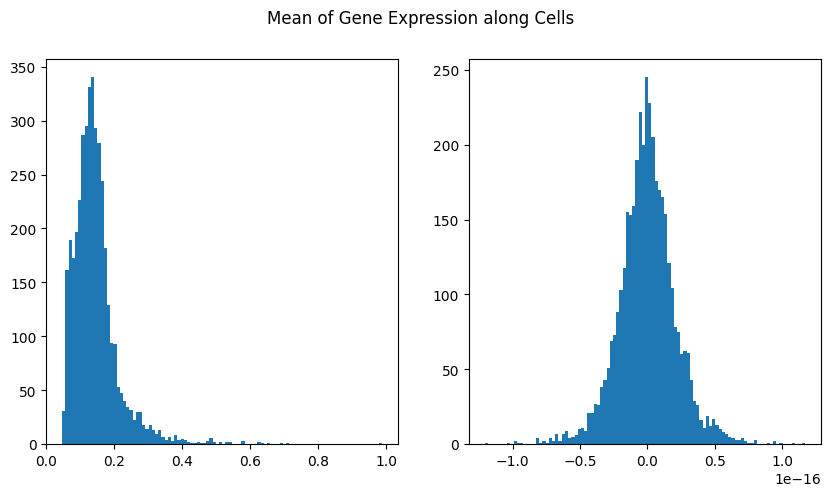

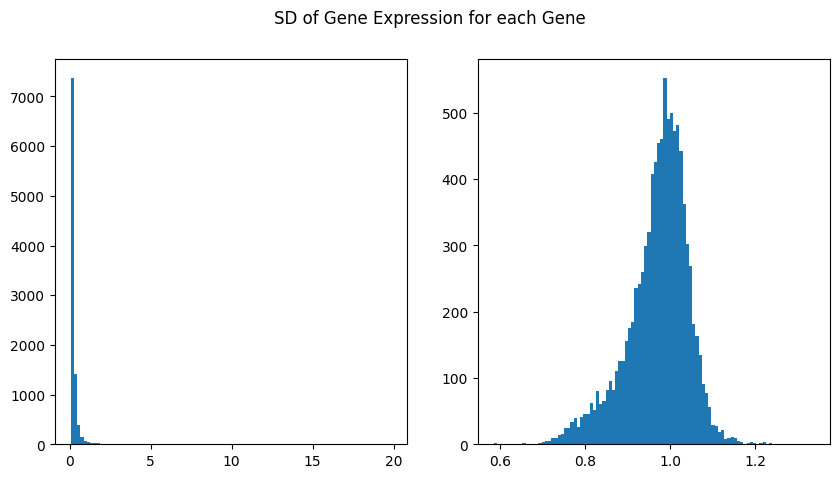

In [7]:
sclens.plot_preprocessing()

With fit_transform(), scLENS fits to the data, saving the robust components, and returns the projection of the training data to the robust components. For test data, the transform() function could be used, which projects the input data without fitting to it

scLENS adopts a modified version of PCA explained in https://arxiv.org/abs/1810.03602 and implemented in the Randomly python package (https://github.com/RabadanLab/randomly). The steps performed in Randomly can be outlined as:
1) Create randomized data matrix by permutating data points along cells
2) Perform PCA on the original and randomized data, creating two sets of principal components
3) Calculate the Marchenko-Pastur distribution and Tracy-Widom critical eigenvalue
4) Select principal components above the Tracy-Widom threshold, the signal components

scLENS builds on this method by selecting only the components robust from small perturbations among the signal components. scLENS does the following:
1) Perform PCA on the original data
2) Construct *n_rand_matrix* random binary matrices, each having *sparsity* sparsity
3) Create *n_rand_matrix* perturbed data matrices by adding the random binary matrices to the original data
4) Perform PCA on the perturbed data matrices
5) Calculate the correlation between the signal components found in the original data and the signal components found in the perturbed data
6) Select signal components with correlation above *threshold*, the robust components

Note that *sparsity* is automatically calculated by default. Specifying a number during initialization skips the sparsity calculation step

/home/l202255179/ibs/scLENS-py-main/scLENS/PCA.py:158: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(self.L,


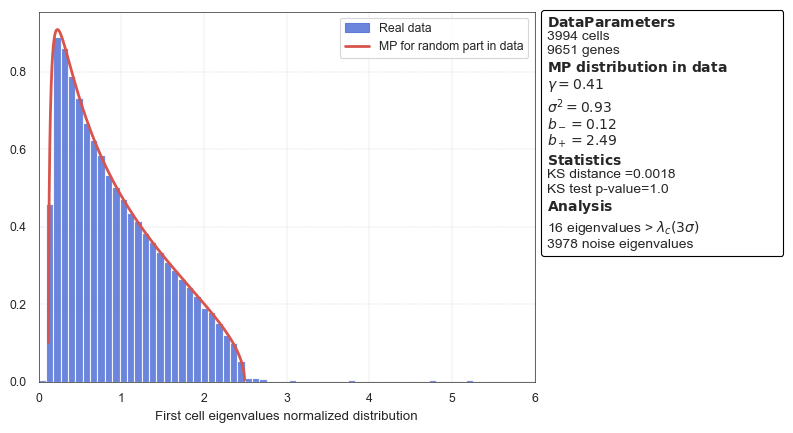

sparsity_th: 0.06002304750374114
Min(corr): 0.09104369075512442, sparsity: 0.999, add_ilen: (38546,)
Min(corr): 0.07939981265110797, sparsity: 0.998, add_ilen: (77092,)
Min(corr): 0.06944643975627829, sparsity: 0.997, add_ilen: (115638,)
Min(corr): 0.06463170987796679, sparsity: 0.996, add_ilen: (154184,)
Min(corr): 0.06296850332644509, sparsity: 0.995, add_ilen: (192730,)
Min(corr): 0.06012916760156435, sparsity: 0.994, add_ilen: (231276,)
Min(corr): 0.05986988418228643, sparsity: 0.993, add_ilen: (269822,)
Min(corr): 0.059094278637461535, sparsity: 0.992, add_ilen: (308368,)
Min(corr): 0.056211277172566666, sparsity: 0.991, add_ilen: (346914,)
Min(corr): 0.05663862475722854, sparsity: 0.99, add_ilen: (385460,)
Min(corr): 0.05507314681380546, sparsity: 0.989, add_ilen: (424007,)


  0%|          | 0/20 [00:00<?, ?it/s]

tensor([[ 3.6504e-01,  2.8911e-01,  3.6504e-01, -2.1853e-02,  4.3653e-02,
          2.3324e-02,  4.3653e-02,  3.0295e-02, -4.2416e-02, -4.1494e-03,
          3.5805e-03, -1.6092e-03, -1.2039e-03,  1.6483e-03, -7.0382e-04,
         -2.0671e-05],
        [ 3.6504e-01,  2.8911e-01,  3.6504e-01, -2.1853e-02,  4.3653e-02,
          2.3324e-02,  4.3653e-02,  3.0295e-02, -4.2416e-02, -4.1494e-03,
          3.5805e-03, -1.6092e-03, -1.2039e-03,  1.6483e-03, -7.0382e-04,
         -2.0671e-05],
        [ 3.2344e-01, -1.3386e-01,  3.2344e-01,  3.2050e-02,  5.0695e-03,
          1.2536e-01,  5.0695e-03,  1.0501e-01, -3.9528e-03,  9.7987e-03,
         -4.0343e-04,  3.9759e-03, -1.4315e-03,  1.6691e-03, -1.9608e-04,
          3.4012e-04],
        [-7.3565e-02, -7.0671e-02, -7.3565e-02,  1.4549e-01,  1.5399e-01,
          6.1750e-01,  1.5399e-01,  5.9328e-02,  1.7300e-02,  2.7151e-03,
         -4.2892e-03, -4.8597e-03,  3.6183e-03, -3.1403e-03, -1.4860e-03,
         -8.5595e-04],
        [ 3.2382e-03

In [8]:
%%time
X_transform = sclens.fit_transform(plot_mp=True)

In [9]:
X_transform

array([[-0.0382569 , -0.02644538,  0.0404371 , ..., -0.14580283,
         0.06993236, -0.02710856],
       [-0.00069108, -0.02014982,  0.02560563, ..., -0.13097276,
         0.07155605, -0.03699895],
       [ 0.00759718, -0.02912981, -0.01168023, ..., -0.13622454,
         0.05191565, -0.03570073],
       ...,
       [ 0.00799909,  0.00268969,  0.00197901, ...,  0.02358255,
        -0.06860649,  0.03839769],
       [-0.01079604,  0.00910882, -0.00518965, ...,  0.02328043,
        -0.00856186, -0.05427389],
       [ 0.0364009 ,  0.01290383, -0.02773104, ...,  0.03066648,
        -0.01833378, -0.08520152]])

In [11]:
sclens._robust_idx

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [9]:
sclens.robust_scores

array([[0.12847806, 0.34999109, 0.3312673 , ..., 0.99575618, 0.99779373,
        0.99839825],
       [0.12273892, 0.28362078, 0.35003916, ..., 0.99583129, 0.99784708,
        0.99846285],
       [0.17377721, 0.43681793, 0.41978331, ..., 0.99581227, 0.99772381,
        0.99846929],
       ...,
       [0.12755416, 0.28107434, 0.31101918, ..., 0.99585192, 0.9977175 ,
        0.99843017],
       [0.1133752 , 0.34310782, 0.51464158, ..., 0.99554746, 0.99782453,
        0.99848151],
       [0.32153846, 0.38262681, 0.2616395 , ..., 0.99578599, 0.99776573,
        0.9984698 ]])

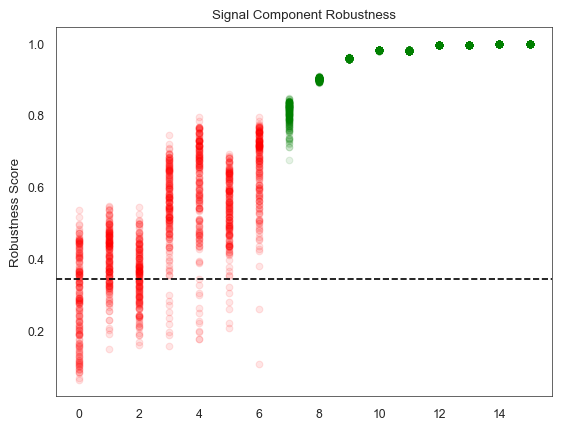

In [10]:
sclens.plot_robust_score()

In [10]:
sclens.sparsity

0.999

In [11]:
sclens.robust_components.shape

(3994, 16)

The projected data can be visualized in any mapping of your choice

<Axes: >

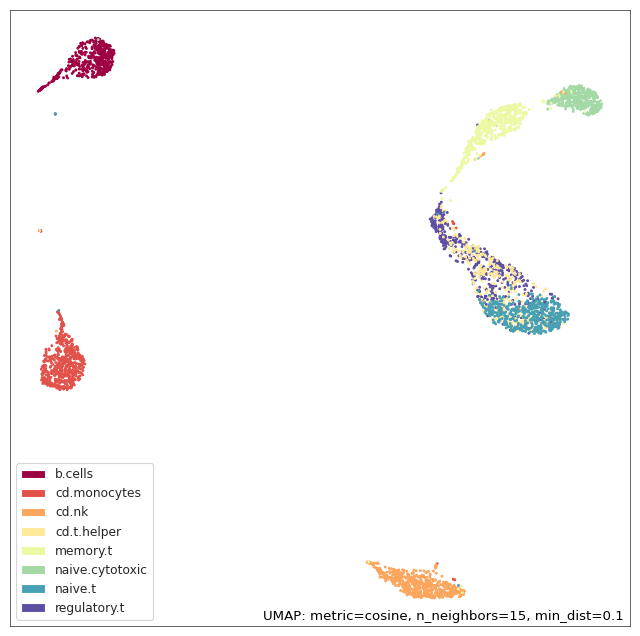

In [12]:
mapper = umap.UMAP(metric='cosine').fit(X_transform)
umap.plot.points(mapper, labels=y_true)

sclens.Clustering offers a clustering function, find_clusters(), as well as an automatic chooser for the resolution parameter, chooseR(), based on the R package https://github.com/rbpatt2019/chooseR. 

In [14]:
from scLENS.clustering import find_clusters, chooseR 

In [15]:
X_transform.shape

(3994, 16)

In [16]:
resolution = chooseR(X_transform, reps=5, n_jobs=-1) # Use all available CPU for parallel computation

Calculating scores: 100%|██████████| 10/10 [01:09<00:00,  6.96s/it]


In [17]:
clustering = find_clusters(X_transform, res=resolution)

<Axes: >

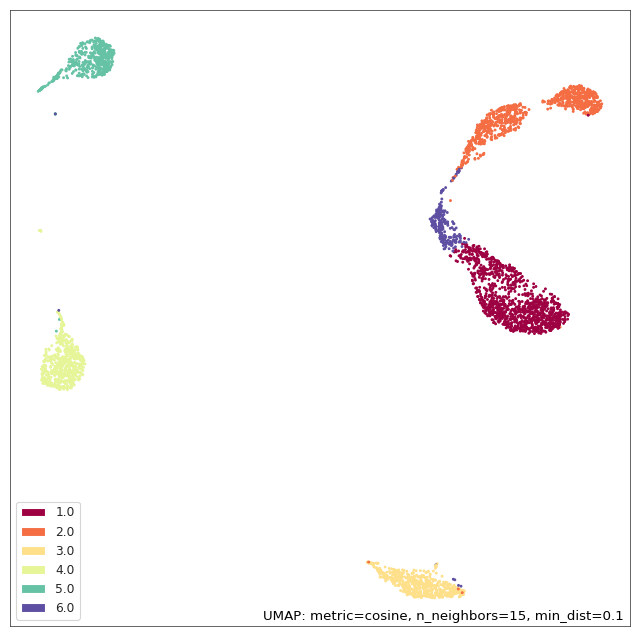

In [18]:
umap.plot.points(mapper, labels=clustering)